<a href="https://colab.research.google.com/github/zaeyonz/Fashion_MNIST/blob/main/Fashoin_MNIST_(Deep_Neural_Network%2C_DNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***2개의 층***
- 앞서 했던 모델의 성능을 높여보자

In [1]:
# 패션 MNIST 데이터셋 불러오기

from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


1. 그다음 이미지의 픽셀값을 0 ~ 255 범위에서 0 ~ 1 사이로 변환
2. 28 X 28 크기의 2차원 배열을 784 크기의 1차원 배열로 펼치기
3. train_test_split() 함수로 train set와 validation set로 나누기

In [11]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1,28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

- ***이제 인공신경망 모델에 층을 2개 추가***
- 이렇게 입력층과 출력층 사이에 있는 모든 층을 ***은닉층 (hidden layer)***라고 부름
---
## 시그모이드 함수
- 뉴런의 출력 z 값을 0과 1사이로 압축함!!
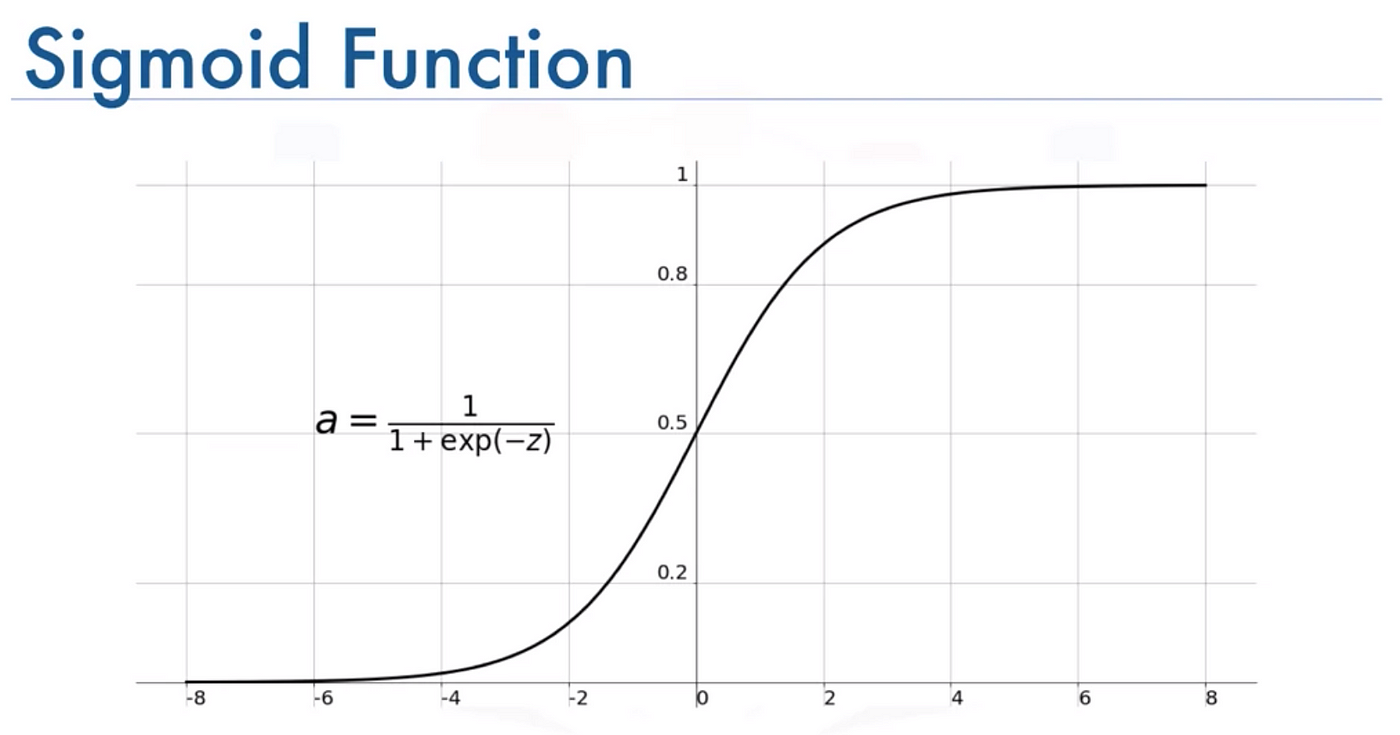

In [12]:
# 시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스를 사용한 출력층을 케라스의 Dense 클래스로 만들기

dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

- dense1이 은닉층이고 100개의 뉴런을 가진 밀집층임
- ***은닉층의 뉴런 개수를 정하는데는 특별한 기준이 없음, 몇개의 뉴런을 두어야 할지 판단하기 위해서는 상당한 경험이 필요함***
- ***적어도 출력층의 뉴런보다는 은닉층의 뉴런개수가 더 많아야함@!@!@!!***

# ***심층 신경망 만들기***
- dense1과 dense2 객체를 Sequential 클래스에 추가하여 **심층 신경망** 생성

In [13]:
model = keras.Sequential([dense1, dense2])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


# ***층을 추가하는 다른 방법***
- Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만드는 경우가 많음
- 이렇게 작업하면 추가되는 층을 한눈에 쉽게 알아볼 수 있음

In [15]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,),
                       name = 'hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name ='패션 MNIST 모델')

In [16]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Sequential 클래스에서 층을 추가할 때 가장 널리 사용하는 방법은 모델의 add() 메서드임

model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
# model 훈련 , complir() 메서드 사용

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5719 - accuracy: 0.8075
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4145 - accuracy: 0.8510
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3783 - accuracy: 0.8632
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3550 - accuracy: 0.8718
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3376 - accuracy: 0.8774


# ***Relu function***
- 이미지 분류 문제에서 높은 성능을 냄
- 입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고 음수일 경우 0으로 만듦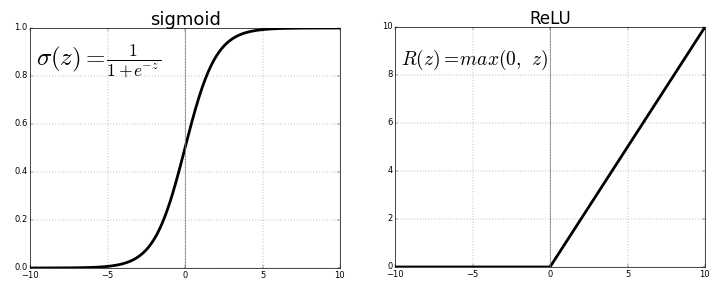

- 렐루 함수는 max(0,z)와 같이 쓸 수 있음
- z가 0보다 크면 z를 출력하고 z가 0보다 작으면 0을 출력함


# ***Flatten 층***
- 패션 MNIST 데이터는 28 X 28 크기이기 때문에 인공 신경망에 주입하기 위해 numpy 배열의 reshape() 메서드를 사용해 1차원으로 펼쳤음
- ***이 과정을 케라스에선 Flatten 층으로 시행함!!***
- Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 함
- 인공 신경망의 성능에 기여하는 바가 없음!


In [20]:
from keras.api._v2.keras import activations
# Flatten 층과 relu 함수를 이용하여 model에 추가

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 새로운 train data 준비

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [24]:
# model 컴파일, model 훈련

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5311 - accuracy: 0.8129
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3921 - accuracy: 0.8580
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3515 - accuracy: 0.8717
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3319 - accuracy: 0.8791
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3141 - accuracy: 0.8875


In [25]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3559 - accuracy: 0.8773


[0.3558887243270874, 0.8772500157356262]

- 성능이 조금 향상됨!

# ***Optimizer (옵티마이저)***

- 케라스는 기본적으로 미니배치 경사 하강법을 사용하며 미니배치 개수는 32개임
- fit() 메서드의 batch_size 매개변수에서 이를 조정할 수 있음 --> 하이퍼 파라미터!
- fit() 메서드의 epochs 매개변수도 하이퍼 파라미터임
- ***케라스는 다양한 종류의 경사하강법 알고리즘을 제공함***
- 이들을 ***Optimizer (옵티마이저)***라고 부름

In [28]:
# SGD optimzer --> 가장 기본적인 옵티마이저인 확률적 경사 하강법

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics='accuracy')
# model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy',metrics='accuracy') 윗 줄과 동일한 코드임

In [30]:
# sgd의 학습률을 바꾸고 싶다면

sgd = keras.optimizers.SGD(learning_rate=0.1)

- 기본 경사 하강법 옵티마이저는 모두 SGD 클래스에서 제공함
- SGD 클래스의 momentum 매개변수의 기본값은 0임
- 이를 ***0보다 크게 지정하면 마치 이전의 그래디언트를 가속도처럼 사용하는 모멘텀 최적화 (momentum optimization)***를 사용함
- 보통 momentum 매개변수는 0.9 이상을 지정함
----
- SGD 클래스의 nesterov 매개변수의 값을 True로 바꾸면 ***네스테로프 모멘텀 최적화 (nesterov momentum opimization)(또는 네스테로프 가속 경사)*** 를 사용함

In [32]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

- ***네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현함***
- ***대부분의 경우 기본 확률적 경사하강법 보다 더 나은 성능을 보임***

# ***adaptive learnin rate (적응적 학습률)***
- 모델이 최적점에 가까이 갈수록 학습률을 낮추면 안정적으로 최적점에 수렴할 가능성이 높음
- 이런 학습률을 ***adaptive learnin rate (적응적 학습률)*** 이라고 함
- 대표적인 옵티마이저는 ***Adagrad과 RMSprop***임
- optimizer 매개변수의 기본값이 'rmsprop'임

In [35]:
# Adagrad 옵티마이저 사용

adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [36]:
# RMSprop 옵티마이저 사용

rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

- 모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam임
- ***Adam은 RMSprop와 함게 맨 처음 시도해 볼 수 있는 좋은 알고리즘임***
- 적응적 학습률을 사용하는 이 3개의 클래스는 learnin_rate 매개변수의 기본값으로 모두 0.001을 사용함

In [37]:
# Adam 클래스의 매개변수 기본값을 사용해 모델을 훈련

# 모델 생성
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 모델 컴파일, 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5277 - accuracy: 0.8158
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3925 - accuracy: 0.8603
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3503 - accuracy: 0.8739
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3208 - accuracy: 0.8834
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.8865


In [38]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3735 - accuracy: 0.8657


[0.3734774887561798, 0.8656666874885559]